In [1]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

#import cv2

%matplotlib inline

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam


Using TensorFlow backend.


In [2]:
import sys
sys.path.append('/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages')
import cv2

In [3]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-3zxcc6vq
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-3zxcc6vq
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65241 sha256=095e327007faed2f4019a2658cfdc747a5d41563b48cc96fe0910e0baaa7cbd9
  Stored in directory: /tmp/pip-ephem-wheel-cache-fka4xgp0/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [39]:
from urllib.request import urlopen
import os

from albumentations import (
    HorizontalFlip, ShiftScaleRotate,RandomRotate90, Blur,Compose,  RGBShift, VerticalFlip, BboxParams,)

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

# 1.このSprintについて
### Sprintの目的  
データセットを作成し学習する  
データ拡張を行う  
  
### どのように学ぶか  
自作のデータセットを作り、さらにデータ拡張も行なっていきます。  
  
# 2.自作データセットの学習
自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

## ① osを使用する場合

In [5]:
# フォルダ内のファイルを読みこむ
path = './Sample' 
flist = os.listdir(path)

In [6]:
# ls コマンドでフォルダ内のファイルを確認
!ls -a ./Sample

.	    cat_02.jpg	cat_04.jpg  dog_01.jpg	dog_03.jpg  dog_05.jpg
..	    cat_02.xml	cat_04.xml  dog_01.xml	dog_03.xml  dog_05.xml
cat_01.jpg  cat_03.jpg	cat_05.jpg  dog_02.jpg	dog_04.jpg
cat_01.xml  cat_03.xml	cat_05.xml  dog_02.xml	dog_04.xml


In [7]:
# フォルダ内のファイル確認
flist

['dog_04.xml',
 'dog_03.xml',
 'dog_02.xml',
 'dog_04.jpg',
 'cat_01.jpg',
 'dog_01.xml',
 'cat_04.jpg',
 'cat_03.xml',
 'cat_01.xml',
 'cat_04.xml',
 'cat_03.jpg',
 'dog_05.jpg',
 'cat_05.xml',
 'cat_05.jpg',
 'dog_05.xml',
 'dog_02.jpg',
 'dog_01.jpg',
 'dog_03.jpg',
 'cat_02.jpg',
 'cat_02.xml']

## ② globを使用する場合

In [8]:
# フォルダ内のファイルパスを取得
img_list = glob.glob('./Sample/*' + ".jpg")

In [9]:
# フォルダ内のファイル確認
img_list 

['./Sample/dog_04.jpg',
 './Sample/cat_01.jpg',
 './Sample/cat_04.jpg',
 './Sample/cat_03.jpg',
 './Sample/dog_05.jpg',
 './Sample/cat_05.jpg',
 './Sample/dog_02.jpg',
 './Sample/dog_01.jpg',
 './Sample/dog_03.jpg',
 './Sample/cat_02.jpg']

## ③ イメージのロード、配列化、リサイズ、データセット作成

In [10]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        


## ④ イメージの出力

In [11]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.22352941, 0.18823529, 0.16862745],
        [0.20392157, 0.16862745, 0.14901961],
        [0.14509804, 0.10980392, 0.09019608],
        ...,
        [0.38823529, 0.30588235, 0.27843137],
        [0.35294118, 0.29019608, 0.2627451 ],
        [0.35294118, 0.28627451, 0.25882353]],

       [[0.22352941, 0.18823529, 0.16862745],
        [0.20392157, 0.16862745, 0.14901961],
        [0.14509804, 0.10980392, 0.09019608],
        ...,
        [0.38431373, 0.30196078, 0.2745098 ],
        [0.34901961, 0.28235294, 0.25882353],
        [0.34901961, 0.28235294, 0.25490196]],

       [[0.22352941, 0.18823529, 0.16862745],
        [0.20392157, 0.16862745, 0.14901961],
        [0.14509804, 0.10980392, 0.09019608],
        ...,
        [0.38039216, 0.29803922, 0.27058824],
        [0.34117647, 0.2745098 , 0.24705882],
        [0.34509804, 0.27843137, 0.25098039]],

       ...,

       [[0.25490196, 0.2       , 0.16470588],
        [0.25882353, 0.20392157, 0.16862745],
        [0.2627451 , 0

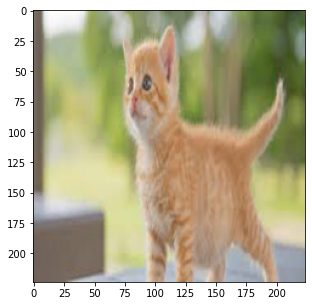

In [12]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[0])
plt.show()

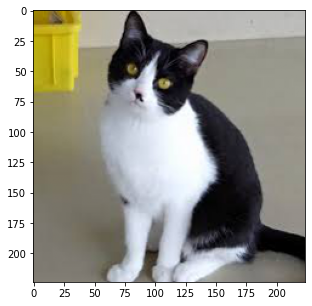

In [13]:
plt.imshow(cat_img_array[1])
plt.show()

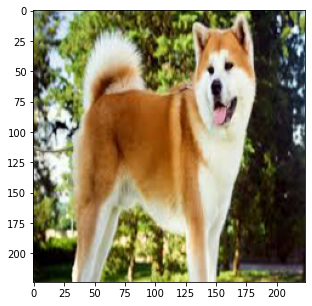

In [14]:
plt.imshow(dog_img_array[3])
plt.show()

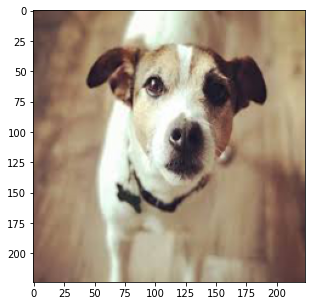

In [15]:
plt.imshow(dog_img_array[1])
plt.show()

## ⑤ データセット作成

In [16]:
X = np.concatenate([cat_img_array, dog_img_array], axis=0)

cat_label = np.zeros(5)
dog_label = np.ones(5)
y = np.concatenate([cat_label, dog_label], axis=0)

## ⑥ 学習と推定

In [17]:
# セッションをクリアする
K.clear_session()

# モデルの定義
model = Sequential()
model.add(Conv2D(24, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(24, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

# モデルのコンパイル
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 学習
history = model.fit(X, y,
                    epochs=10,
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 3s 284ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 159ms/step - loss: 0.3898 - accuracy: 0.9000
Epoch 3/10
10/10 [==============================] - 2s 154ms/step - loss: 3.2063 - accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 2s 154ms/step - loss: 4.5500 - accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 2s 151ms/step - loss: 2.0302 - accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 2s 153ms/step - loss: 0.1109 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 2s 151ms/step - loss: 0.7859 - accuracy: 0.6000
Epoch 8/10
10/10 [==============================] - 2s 153ms/step - loss: 0.4205 - accuracy: 0.8000
Epoch 9/10
10/10 [==============================] - 2s 152ms/step - loss: 0.1356 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 1s 150ms/step - loss: 0.1791 - accuracy: 0.9000

# 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。
### 《データ拡張のためのライブラリ》
データ拡張にはalbumentationsなどがあります。  
albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries  
  
また、Kerasを使う場合はImageDataGeneratorも便利です。

In [18]:
def augmentation(img_list):

    img_array = np.empty((0, 224,224,3))

    # 画像変換
    for img in img_list:

        # 画像の読み込み
        image = cv2.imread(img)

        # サイズを揃える
        image = cv2.resize(image, (224, 224))

        # RGBからBGRへ変換
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        # ⓪ 元画像
        image_original = (image / 255.).reshape(1, 224 ,224 , 3) 


        #  ① ぼかし
        # ガウシアンフィルタを用いて画像をぼかす。第二引数はカーネルサイズ。カーネルサイズはn×nでnは奇数。数値が大きいほどぼかしが強くなる
        image_gauss = cv2.GaussianBlur(image, (21, 21), 0)

        image_gauss = (image_gauss / 255.).reshape(1, 224, 224, 3) 


        # ② 反転
        # flip関数の第二引数で反転の種類を選択する
        # 「0」： x軸を中心に上下反転
        # 「1」： y軸を中心に左右反転
        # 「-1」： 両方の軸を中心に反転
        image_flip_x = cv2.flip(image, 0)
        image_flip_xy = cv2.flip(image, -1)

        image_flip_x = (image_flip_x / 255.).reshape(1, 224, 224, 3)    
        image_flip_xy = (image_flip_xy / 255.).reshape(1, 224, 224, 3)    


        # ③　色反転
        # bitwise関数で色反転する
        image_bitwise = cv2.bitwise_not(image)

        image_bitwise = (image_bitwise / 255.).reshape(1, 224, 224, 3)   


        # ④ 色調変換
        # cvtColor関数でBGR色空間をLab色空間に変換する
        image_cvtColor = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

        image_cvtColor = (image_cvtColor / 255.).reshape(1, 224, 224, 3)   


        # ⑤ 膨張・収縮
        # 膨張はピクセルを中心にフィルタ内の最大値を中心の値に、収縮はその逆にする
        filt = np.ones((3, 3), np.uint8)
        image_dilate = cv2.dilate(image, filt) # 収縮
        image_erode = cv2.erode(image, filt) # 膨張

        image_dilate = (image_dilate / 255.).reshape(1, 224, 224, 3)   
        image_erode = (image_erode / 255.).reshape(1, 224, 224, 3)   


        # ⑥ 閾値処理
        # threshold関数の第二引数を閾値として、これを超えた時に第四引数で与えた処理を行う
        # 第三引数はmaxValue
        # 第四引数
        # 「THRESH_BINARY」： 閾値を超えるピクセルはmaxValueに、それ以外のピクセルは0にする
        # 「THRESH_BINARY_INV」： 閾値を超えるピクセルは0に、それ以外のピクセルはmaxValueにする
        # 「THRESH_TRUNC」： 閾値を超えるピクセルは閾値に、それ以外のピクセルは0にする
        # 「THRESH_TOZERO」： 敷地を超えるピクセルは変更せず、それ以外のピクセルは0にする
        # 「THRESH_TOZERO_INV」： 閾値を超えるピクセルは0に、それ以外のピクセルは変更しない
        retval, image_thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
        retval, image_thresh_trunc = cv2.threshold(image, 100, 255, cv2.THRESH_TRUNC)

        image_thresh_binary = (image_thresh_binary / 255.).reshape(1, 224, 224, 3)
        image_thresh_trunc = (image_thresh_trunc / 255.).reshape(1, 224, 224, 3)       


        img_array = np.concatenate([img_array, 
                                    image_original, 
                                    image_gauss,
                                    image_flip_x,
                                    image_flip_xy,
                                    image_bitwise,
                                    image_cvtColor,
                                    image_dilate,
                                    image_erode,
                                    image_thresh_binary,
                                    image_thresh_trunc], axis=0)
        
        return img_array

In [19]:
img_array = augmentation(img_list)

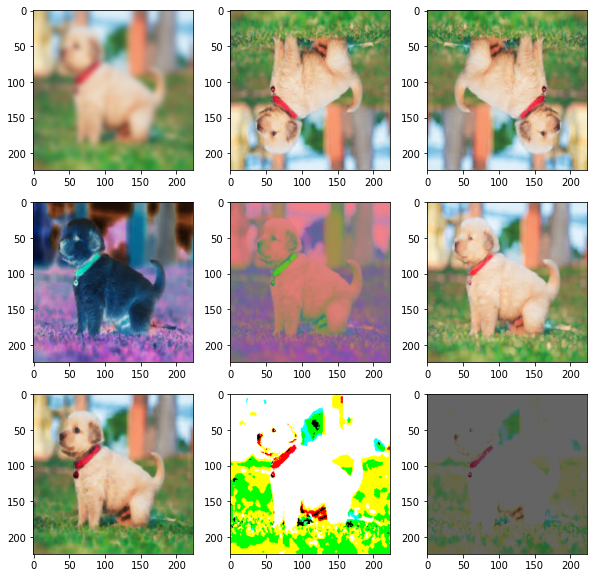

In [20]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (10.0, 10.0)

plt.subplot(3, 3, 1)
plt.imshow(img_array[1])
plt.subplot(3, 3, 2)
plt.imshow(img_array[2])
plt.subplot(3, 3, 3)
plt.imshow(img_array[3])
plt.subplot(3, 3, 4)
plt.imshow(img_array[4])
plt.subplot(3, 3, 5)
plt.imshow(img_array[5])
plt.subplot(3, 3, 6)
plt.imshow(img_array[6])
plt.subplot(3, 3, 7)
plt.imshow(img_array[7])
plt.subplot(3, 3, 8)
plt.imshow(img_array[8])
plt.subplot(3, 3, 9)
plt.imshow(img_array[9])

plt.show()

# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。  
  
### 《アノテーションのためのツール》
  
アノテーションツールにはLabelImgなどがあります。  
  
tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images

### アノテーションファイル

```xml
<annotation>  
	<folder>animal</folder>  
	<filename>cat_01.jpg</filename>  
	<path>/Users/chidori/Desktop/animal/cat_01.jpg</path>  
	<source>  
		<database>Unknown</database>  
	</source>  
	<size>  
		<width>331</width>  
		<height>152</height>  
		<depth>3</depth>  
	</size>  
	<segmented>0</segmented>  
	<object>  
		<name>cat</name>  
		<pose>Unspecified</pose>  
		<truncated>1</truncated>  
		<difficult>0</difficult>  
		<bndbox>  
			<xmin>109</xmin>  
			<ymin>8</ymin>  
			<xmax>305</xmax>  
			<ymax>152</ymax>  
		</bndbox>  
	</object>  
</annotation>  
```

# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。  
  
物体検出の学習を行なうかどうかは任意とします。

In [21]:
# フォルダ内のアノテーションファイルのパス取得
bbox_list = glob.glob('./Sample/*' + ".xml")
bbox_list

['./Sample/dog_04.xml',
 './Sample/dog_03.xml',
 './Sample/dog_02.xml',
 './Sample/dog_01.xml',
 './Sample/cat_03.xml',
 './Sample/cat_01.xml',
 './Sample/cat_04.xml',
 './Sample/cat_05.xml',
 './Sample/dog_05.xml',
 './Sample/cat_02.xml']

In [118]:
# xmlパースをする
from xml.etree import ElementTree

bbox = np.empty((0, 4))

for annote in bbox_list:
    
    tree = ElementTree.parse(annote)
    root = tree.getroot()
    data = root.find('object').find("bndbox")

    xmin = int(data.find("xmin").text)
    ymin = int(data.find("ymin").text)
    xmax = int(data.find("xmax").text)
    ymax = int(data.find("ymax").text)    
    
    buf = np.array([xmin, ymin, xmax, ymax]).reshape(1, 4)
    bbox = np.concatenate([bbox, buf], axis=0)

bbox

array([[ 40.,  18., 218., 167.],
       [ 67.,  14., 172., 167.],
       [  9.,  26., 206., 150.],
       [ 36.,   3., 248., 168.],
       [ 47.,   3., 230., 162.],
       [109.,   8., 305., 152.],
       [ 54.,   1., 225., 225.],
       [ 46.,  32., 268., 158.],
       [ 48.,   1., 215., 201.],
       [ 26.,  45., 210., 131.]])

In [119]:
image=cv2.imread(img_list[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [120]:
bboxes = [bbox[0]]
category_ids = [0]

In [121]:
category_id_to_name = {0: 'cat', 1: 'dog'}

In [122]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [123]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

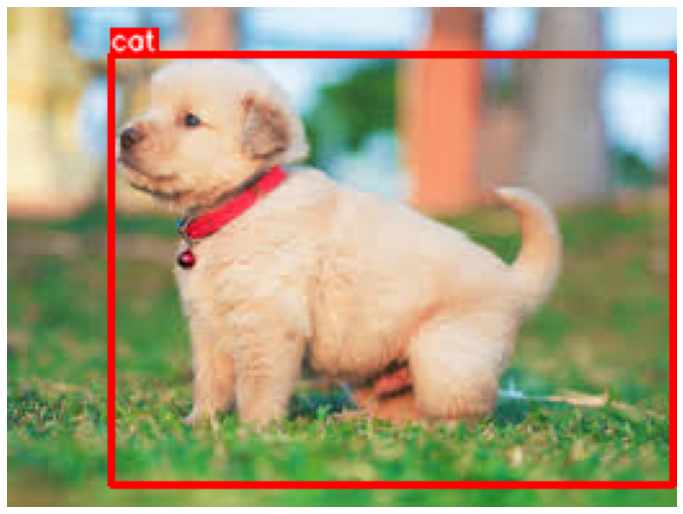

In [124]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [125]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

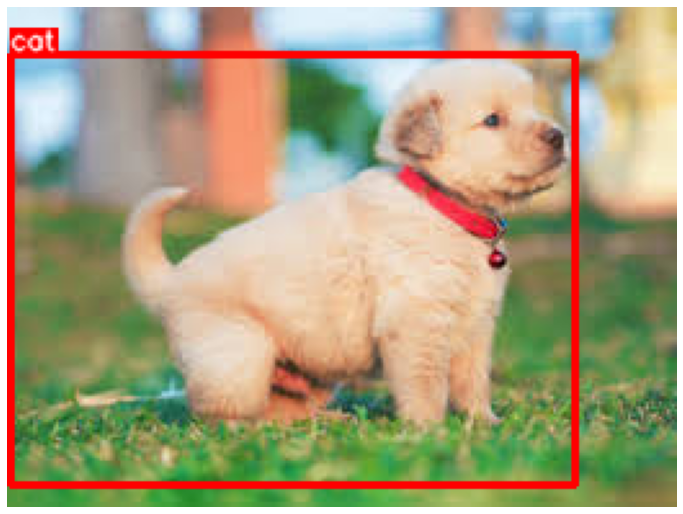

In [126]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)